In [2]:
data = '''id,X,Y
1,14,36
2,21,49
3,25,72
4,8,24
5,20,56
6,18,48
7,17,51
8,3,10
9,1,3
10,10,32'''

 Y = θ0+θ1x1+E
 где Y -  случайный параметр, 
 θ0 , θ1 – числовые параметры, X1 – неслучайный параметр, ε –
 случайная ошибка, называется моделью простейшей линейной регрессии.

 для определиния θ0, θ1 метод наименьших кватдратов (E минимально)
 минимальная сумма E**2 = (Y - θ0 - θ1x1) **2
 минимум достигается при
 
 Y = θ0+θ1x1+E
 θ0 = Yср-θ1*Xср
 θ1 = (x1-Xср)(y1-Yср)/(x1-Xср)**2
 
 Y = (Yср-((x1-Xср)(y1-Yср)/(x1-Xср)**2)*Xср) + ((x1-Xср)(y1-Yср)/(x1-Xср)**2)*x1

In [3]:
import pandas as pd
import io
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv(io.StringIO(data), index_col = 'id')
data

,X,Y
id,,
1,14,36
2,21,49
3,25,72
4,8,24
5,20,56
6,18,48
7,17,51
8,3,10
9,1,3


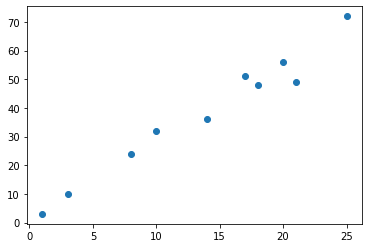

In [5]:
plt.scatter(data.X, data.Y);


In [6]:
print(data.X.mean())
print(data.Y.mean())

13.7
38.1


In [7]:
#подключаем модель линейной регрессии из библиотеки sklearn
from sklearn.linear_model import LinearRegression

In [8]:
X_train = pd.DataFrame(data.X)
y_train = pd.DataFrame(data.Y)
X_train

,X
id,
1,14
2,21
3,25
4,8
5,20
6,18
7,17
8,3
9,1


In [9]:
#обучаем модель линейной регрессии
reg_model = LinearRegression().fit(X_train, y_train)

In [13]:
# Тета 0
Oeta = reg_model.intercept_
Oeta

array([1.95700052])

In [14]:
round(float(Oeta),2)

1.96

In [15]:
# Тета 1
Oeta1 = reg_model.coef_
round(float(Oeta1),2)

2.64

In [27]:
# для понимания проверим коэффициенты:
def y_linreg(x):
    Y = 1.96 + 2.64*x
    return Y
y= y_linreg(14)
print(14,y)
test_df = pd.DataFrame()
# наполняем датафрейм значениями y посчитанными для каждого х
test_df = y_linreg(X_train)
test_df.columns=['Y_own_func']
test_df['Y_original'] = y_train
test_df

14 38.92


,Y_own_func,Y_original
id,,
1,38.92,36
2,57.40,49
3,67.96,72
4,23.08,24
5,54.76,56
6,49.48,48
7,46.84,51
8,9.88,10
9,4.60,3


In [29]:
# предсказываем занчения Y используя заначения X
# передаем в обученную модель 
reg_model.predict(X_train)

array([[38.89145254],
       [57.35867855],
       [67.91137913],
       [23.06240168],
       [54.72050341],
       [49.44415312],
       [46.80597798],
       [ 9.87152596],
       [ 4.59517567],
       [28.33875197]])

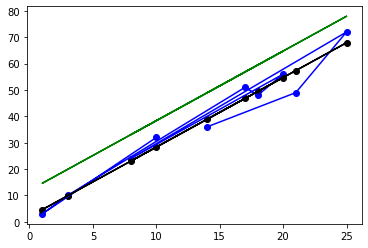

In [50]:
# точки имеющихся данных
plt.scatter(data.X, data.Y, color="blue")
# соединяем точки линией
plt.plot(data.X, data.Y, color="blue")
# линии и точки предсказанные точки и лини из них
plt.plot(data.X, reg_model.predict(X_train), color="black")
plt.scatter(data.X, reg_model.predict(X_train), color="black")
# значения из собественной функции для теста
# +10 по Y чтобы не сливалась с черной линией
plt.plot(data.X, test_df['Y_own_func']+10, color='green')
# plt.plot([1,2,3,4,5,6],[1,2,3,5,10,100]) первый список - x, второй y, для примера
plt.show()

In [53]:
# Для нахождения 𝑅2
# предсказываем значения Y используя обученную модель
y_predicted = reg_model.predict(X_train)
y_predicted

array([[38.89145254],
       [57.35867855],
       [67.91137913],
       [23.06240168],
       [54.72050341],
       [49.44415312],
       [46.80597798],
       [ 9.87152596],
       [ 4.59517567],
       [28.33875197]])

In [54]:
# сравним с вручную созанной функцией
test_df['y_predict'] = y_predicted
test_df

,Y_own_func,Y_original,y_predict
id,,,
1,38.92,36,38.891453
2,57.40,49,57.358679
3,67.96,72,67.911379
4,23.08,24,23.062402
5,54.76,56,54.720503
6,49.48,48,49.444153
7,46.84,51,46.805978
8,9.88,10,9.871526
9,4.60,3,4.595176


In [67]:
from sklearn.metrics import r2_score
# Оценка R2 – это один из показателей оценки эффективности моделей
R2 = r2_score(y_train, y_predicted)
round(R2,2)

0.58

## Задание 2

In [115]:
# Задание 2
#чтение данных, так как названия конфет уникальны, используем их в качестве индекса
DATA = pd.read_csv("candy-data.csv", delimiter=',', index_col='competitorname')
# DATA.shape
DATA

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
competitorname,,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,59.529251,1
Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998,1
Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116,52.825947,1


In [116]:
#обучение модели будем проводить на данных, за исключением некоторых конфет
train_data = DATA.drop(['One dime','Nestle Butterfinger'])
train_data

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
competitorname,,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1
Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,59.529251,1
Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998,1
Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116,52.825947,1


In [117]:
#отбираем данные для предикторов, удаляя два последних столбца, индекс не включается в данные.
X_train = pd.DataFrame(train_data.drop(['winpercent', 'Y'], axis=1))
X_train

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
competitorname,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511
Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767
...,...,...,...,...,...,...,...,...,...,...,...
Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651
Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116
Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116


In [118]:
#указываем столбец отклика
y_train = pd.DataFrame(train_data['winpercent'])
# y_train.hist()

In [119]:
#обучение модели
# передаем предикторы и результаты
reg = LinearRegression().fit(X_train, y_train)
# обученная модель:
reg

LinearRegression()

In [120]:
#предсказание для конфет введеных вручную
reg.predict([[0, 1, 1, 1, 1, 1, 1, 0, 1, 0.26, 0.296]])

array([[57.51458634]])

In [121]:
#предсказание для конфет из таблицы
#выбираем строку из таблицы
AirHeads = DATA.loc[['One dime']]

In [122]:
#передаем данные 'One dime' предикторов и выполняем предсказание с помощью модели
predict_value_1=reg.predict(AirHeads.drop(['winpercent', 'Y'], axis=1))

In [129]:
# сравниваем предсказанное и имеющее значение
# https://proglib.io/p/25-vozmozhnostey-pandas-o-kotoryh-vy-ne-znali-2022-02-28
# to dataframe [[]]
# exist_value = DATA.loc[['One dime']][['winpercent']]
# to float64 []
exist_value = DATA.loc['One dime']['winpercent']
# exist_value = list(exist_value)
dif_value = exist_value - predict_value_1
print(exist_value,' - ', predict_value_1, ' = ', dif_value)

32.261086  -  [[36.63093922]]  =  [[-4.36985322]]


In [124]:
AirHeads = DATA.loc[['Nestle Butterfinger']]
reg.predict(AirHeads.drop(['winpercent', 'Y'], axis=1))

array([[62.8766418]])

In [125]:
# Значение коэффициента 𝜃0
reg.intercept_
#Значение коэффициентов 𝜃1,…,𝜃𝑝

reg.coef_

y_predicted = reg.predict(X_train)

r2_score(y_train, y_predicted)

0.5755504641567877

In [126]:
delta = reg.predict(X_train)-y_train
delta

,winpercent
competitorname,
100 Grand,-1.436709
3 Musketeers,-4.994331
One quarter,-13.030850
Air Heads,0.580080
Almond Joy,11.021336
...,...
Snickers Crisper,13.802424
Sour Patch Kids,-16.591603
Sour Patch Tricksters,-9.553552
